In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_and_Drug = mouse_drug_data_to_load
mouse_and_drug = pd.read_csv(Mouse_and_Drug, low_memory=False)
mouse_and_drug.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
Clinical_Trial = clinical_trial_data_to_load
clinical_trial = pd.read_csv(Clinical_Trial, low_memory=False)

clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_drug_data = pd.merge(mouse_and_drug, clinical_trial, on="Mouse ID")
# Display the data table for preview
combined_drug_data.head()
cdd = combined_drug_data
cdd.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
Tumor_Volume = cdd.groupby(["Drug", "Timepoint"])
Tumor_Volume_mean = Tumor_Volume["Tumor Volume (mm3)"].mean()
Tumor_Growth = pd.DataFrame(Tumor_Volume_mean).reset_index()
Tumor_Growth.head()
# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
Tumor2 = cdd.groupby(["Drug", "Timepoint"])
SE_Tumor = Tumor2["Tumor Volume (mm3)"].sem()
Tumor_Volumes = pd.DataFrame(SE_Tumor).reset_index()
Tumor_Volumes.head()
# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Tumor_Volume = Tumor_Growth.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Tumor_Volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


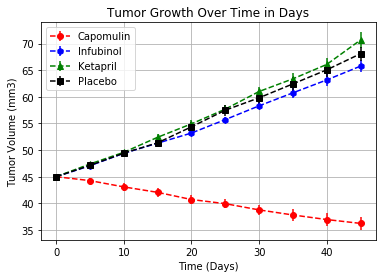

In [8]:
# Generate the Plot (with Error Bars)
# volume changes over time for each drug
capomulin_point = Tumor_Volumes.loc[Tumor_Volumes["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
infubinol_point = Tumor_Volumes.loc[Tumor_Volumes["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
ketapril_point = Tumor_Volumes.loc[Tumor_Volumes["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
placebo_point = Tumor_Volumes.loc[Tumor_Volumes["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, Tumor_Volume["Capomulin"], yerr=capomulin_point, label="Capomulin", marker="o", color="red", linestyle='--')
plt.errorbar(Time, Tumor_Volume["Infubinol"], yerr=infubinol_point, label="Infubinol", marker="h", color="blue", linestyle='--')
plt.errorbar(Time, Tumor_Volume["Ketapril"], yerr=ketapril_point, label="Ketapril", marker="^", color="green", linestyle='--')
plt.errorbar(Time, Tumor_Volume["Placebo"], yerr=placebo_point, label="Placebo", marker="s", color="black", linestyle='--')
# acceptable marker types: o + * . x s d < > ^  v p h none 
plt.title("Tumor Growth Over Time in Days")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend()
# Save the Figure

# Show the Figure
plt.savefig('volume.png')

In [9]:
cdd.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_Sites = cdd.groupby(["Drug", "Timepoint"])
mean_met = Metastatic_Sites["Metastatic Sites"].mean()
Metastatic_mean = pd.DataFrame(mean_met).reset_index()
Metastatic_mean.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
Metastatic_Sites2 = cdd.groupby(["Drug", "Timepoint"])
sem_met = Metastatic_Sites2["Metastatic Sites"].sem()
Metastatic_SE = pd.DataFrame(sem_met).reset_index()
Metastatic_SE.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
Met_Sites = Metastatic_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
Met_Sites
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


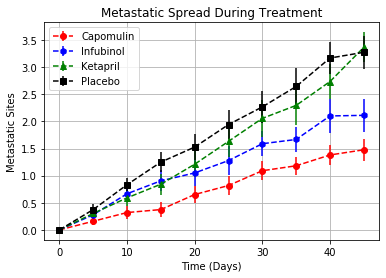

In [13]:
# Generate the Plot (with Error Bars)
capomulin_point = Metastatic_SE.loc[Metastatic_SE["Drug"] == "Capomulin", "Metastatic Sites"]
infubinol_point = Metastatic_SE.loc[Metastatic_SE["Drug"] == "Infubinol", "Metastatic Sites"]
ketapril_point = Metastatic_SE.loc[Metastatic_SE["Drug"] == "Ketapril", "Metastatic Sites"]
placebo_point = Metastatic_SE.loc[Metastatic_SE["Drug"] == "Placebo", "Metastatic Sites"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, Met_Sites["Capomulin"], yerr=capomulin_point, label="Capomulin", marker="o", color="red", linestyle='--')
plt.errorbar(Time, Met_Sites["Infubinol"], yerr=infubinol_point, label="Infubinol", marker="h", color="blue", linestyle='--')
plt.errorbar(Time, Met_Sites["Ketapril"], yerr=ketapril_point, label="Ketapril", marker="^", color="green", linestyle='--')
plt.errorbar(Time, Met_Sites["Placebo"], yerr=placebo_point, label="Placebo", marker="s", color="black", linestyle='--')
# acceptable marker types: o + * . x s d < > ^  v p h none 
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend()

# Save the Figure

# Show the Figure
plt.savefig('metasites.png')

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
Count_Mice = cdd.groupby(["Drug", "Timepoint"]).agg({"Mouse ID": ['count']})
Count_Mice.head()
# Preview DataFrame
Mouse_Count = pd.DataFrame(Count_Mice).reset_index()
Mouse_Count.head()

,Drug,Timepoint,Mouse ID
,,,count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Count = pd.DataFrame(Count_Mice).reset_index()
Mice_Count=Mouse_Count.pivot(index='Timepoint', columns='Drug', values=['Mouse ID'])
Mice_Count.head()
# Preview the Data Frame


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [40]:
# Generate the Plot (Accounting for percentages)
Capomulin = Mice_Count.loc[Mice_Count["Drug"] == "Capomulin"]
Infubinol = Mice_Count.loc[Mice_Count["Drug"] == "Infubinol"]
Ketapril = Mice_Count.loc[Mice_Count["Drug"] == "Ketapril"]
Placebo = Mice_Count.loc[Mice_Count["Drug"] == "Placebo"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
# plt.plot(Time, (Mice_Count["Capomulin"]/25)*100, label="Capomulin", marker="o", color="red", linestyle="--")
# plt.plot(Time, (Mice_Count["Infubinol"]/25)*100, label="Infubinol", marker="+", color="blue", linestyle="--")
# plt.plot(Time, (Mice_Count["Ketapril"]/25)*100, label="Ketapril", marker="d", color="green", linestyle="--")
# plt.plot(Time, (Mice_Count["Placebo"]/25)*100, label="Placebo", marker="^", color="black", linestyle="--")

plt.errorbar(Time, Mice_Count["Capomulin"], yerr=capomulin_point, label="Capomulin", marker="o", color="red", linestyle='--')
plt.errorbar(Time, Mice_Count["Infubinol"], yerr=infubinol_point, label="Infubinol", marker="h", color="blue", linestyle='--')
plt.errorbar(Time, Mice_Count["Ketapril"], yerr=ketapril_point, label="Ketapril", marker="^", color="green", linestyle='--')
plt.errorbar(Time, Mice_Count["Placebo"], yerr=placebo_point, label="Placebo", marker="s", color="black", linestyle='--')
# acceptable marker types: o + * . x s d < > ^  v p h none 
plt.title("Survival of Mice During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend()
# Save the Figure

# Show the Figure
plt.show()

KeyError: 'Drug'

In [29]:
# Calculate the percent changes for each drug
# (original - new / original) * 100
# Display the data to confirm
Original_Tumor_Volume = 45
Percent_Change = ((Tumor_Volume.loc[45, :]-Original_Tumor_Volume)/Original_Tumor_Volume)*100
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [30]:
# Store all Relevant Percent Changes into a Tuple
tuple_PC = tuple(zip(Percent_Change.index, Percent_Change))
tuple_PC_list = list(tuple_PC)
tuple_PC_list

[('Capomulin', -19.475302667894173),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Naftisol', 53.92334713476923),
 ('Placebo', 51.29796048315153),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.57975086509525)]

In [31]:
# Splice the data between passing and failing drugs
passing = []
failing = []
passing_index = []
failing_index = []
for j, elements in tuple_PC_list :
    if elements > 0 :
        passing_drug = elements
        passing.append(elements)
        passing_index.append(j)
    else :
        failing_drug = elements
        failing.append(elements)
        failing_index.append(j)
Passing_Drug = list(zip(passing_index, passing))
Failing_Drug = list(zip(failing_index, failing))


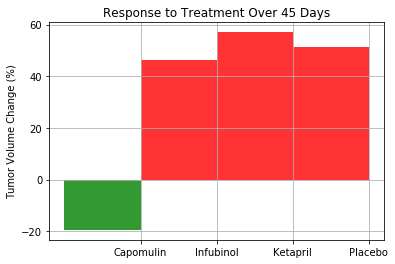

In [39]:
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value = [Percent_Change["Infubinol"], Percent_Change["Ketapril"], Percent_Change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1,2,3]
bars1 = ax.bar(x_axis1, Percent_Change["Capomulin"], color='green', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value, color='red', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], yticks=[-20,0,20,40,60])
ax.set_ylabel('Tumor Volume Change (%)')
ax.set_title("Response to Treatment Over 45 Days")
ax.grid()
fig.show()
plt.savefig('Response to Treatement.png')

Observations:
1. It is clear from all viewable figures that Capromulin is the most effective drug treatment in this study accounting for the least tumor growth, least spread of metastatic sites, and the greatest survival rate amongst the mice.
2. It also appears that the differences seen between Capomulin and the other drugs are significantly different, but further analysis would be needed to confirm this trend.
3. Lastly, the drug treatment, Ketrapil, performed the same as, if not worse than, the placebo, making it the least effective drug in this analysis of the data.